The data Bank Marketing is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Let us validate our basic assumption about the data for a **Naive Bayes Classifier** and build it.

# Data Exploration

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv(r"/kaggle/input/bank-marketing/bank-full.csv")
data.drop_duplicates()
data

In [ ]:
# Importing the matplotlib library
import matplotlib.pyplot as plt

target_counter = len(data[data["y"]=="no"]),len(data[data["y"]=="yes"])

plt.bar(data["y"].unique(), target_counter,color="pink")# Displaying the bar plot

The data is clearly imbalanced. Hence we will use equal samples of it to train our classifiers. 

Other methods include using SMOTE: SYNTHETIC MINORITY OVER-SAMPLING TECHNIQUE which is a type of data augmentation that synthesizes new samples from existing ones. [link to SMOTE implementation on the same dataset: https://www.kaggle.com/nabamitachakraborty/smote]

# Data Preprocessing

Now we extract a balanced sample rather than using the entire unbalanced data.

In [ ]:
target = "y"
sample_size = data[target].value_counts().min()


data = data.groupby('y',as_index=False, group_keys=False).apply(lambda x: x.sample(sample_size))
data = data.reset_index(drop = True)

import seaborn as sns

sns.countplot(x="y",data=data)
data.y.value_counts()

In [ ]:
print(data.info(),"\n\n")
data

In [ ]:
data.describe(include="all")

The Bayes’ theorem, given class variable "y" and dependent feature vector X1 to Xn, states:


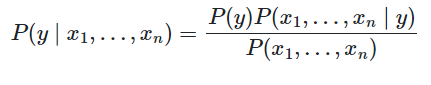

A "naive" assumption while implementing Naive Bayes is that all the features should be independent of each other.
Let us now validate this assumption.

In [ ]:
data.columns[data.dtypes=="object"]

Although it is not ideal to use label encoder for the input data, we encode it to measure co-dependency of the features.

In [ ]:
#Encoding data

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

data_c = data.copy()
for col in data.columns[data.dtypes=="object"]:
    data_c[col]=encoder.fit_transform(data_c[col])
data_c

In [ ]:
X,y = data_c.iloc[:,:-1],data_c.iloc[:,-1]

In [ ]:
#measuring co-dependency: Using corr()
cor = X.corr(method="kendall")
cor

In [ ]:
print("Columns with significant codependency,if any:")

for i in range(len(cor)-1):
    for j in range(i+1,len(cor)):
        if abs(cor.iloc[i,j])>=0.5:
            print(data.columns[i],",",data.columns[j])

Hence we drop the 3 columns **"pdays","previous","poutcome"** to move forward with modeling the Naive Bayes' classifier.

In [ ]:
X.drop(columns=["pdays","previous","poutcome"],inplace=True)


In [ ]:
#measuring co-dependency: alternative: using mutual_info_classif()
X = data_c.iloc[:,:-1]

from sklearn import feature_selection
    
info = [list(feature_selection.mutual_info_classif(X,X[col])) for col in X]

info = pd.DataFrame(info, columns=data.columns[:-1])
info

In [ ]:
print("Columns with significant codependency,if any:")

for i in range(len(info)-1):
    for j in range(i+1,len(info)):
        if abs(info.iloc[i][j])>=0.5:
            print(data.columns[i],",",data.columns[j])

# Modeling

In [ ]:
X

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

print(classification_report(y_test,y_pred))

## Formulae : 
 
1. ![](https://miro.medium.com/max/555/1*C3ctNdO0mde9fa1PFsCVqA.png)
 
2. ![](https://miro.medium.com/max/523/1*dXkDleGhA-jjZmZ1BlYKXg.png)
 
3. ![](https://miro.medium.com/max/353/1*T6kVUKxG_Z4V5Fm1UXhEIw.png)

## Conclusion: We end up with an accuracy of 76%.